# Proyecto: resolviendo un problema con clustering

## Preparar datos para clusterizar

Antes de abordar un proyecto de clusterización, es fundamental realizar algunas tareas de preprocesamiento de datos comunes en la mayoría de los algoritmos de aprendizaje automático:

- **Eliminar duplicados**: Identificar y eliminar registros duplicados en el conjunto de datos para evitar sesgos y asegurar la integridad de los resultados de la clusterización.

- **Remover columnas innecesarias**: Evaluar y eliminar las columnas que no aportan información relevante para el análisis de clusterización, reduciendo la dimensionalidad y mejorando la eficiencia del algoritmo.

- **Remover outliers**: Identificar y tratar los valores atípicos o extremos que pueden distorsionar los resultados y la estructura de los clusters, para obtener una representación más precisa y coherente de los datos.

- **Escalar los datos**: Asegurarse de que todas las características tengan una escala similar, mediante técnicas de normalización o estandarización, evitando que las características con mayor rango dominen en la formación de clusters.

Estas tareas de preprocesamiento son esenciales para garantizar la calidad y fiabilidad de los resultados de la clusterización, permitiendo obtener agrupaciones más significativas y relevantes en los datos analizados.

# Acerca del proyecto

El objetivo del proyecto es categorizar países utilizando factores socioeconómicos y de salud que determinen el desarrollo general del país. HELP International, una ONG humanitaria internacional, ha recaudado $10 millones y necesita decidir estratégicamente cómo utilizar esos fondos. Como científico de datos, tu tarea es categorizar los países según los factores determinantes y sugerir en qué países debe enfocarse el CEO para brindar ayuda.

## Acerca del dataset

[Country Data](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data)

The main dataset containing 167 rows and 10 columns

1. **country:** Name of the country.

2. **child_mort:** Death of children under 5 years of age per 1000 live births.

3. **exports:** Exports of goods and services per capita. Given as %age of the GDP per capita.

4. **health:** Total health spending per capita. Given as %age of GDP per capita.
5. **imports:** Imports of goods and services per capita. Given as %age of the GDP per capita.
6. **income:** Net income per person
7. **inflation:** The measurement of the annual growth rate of the Total GDP
8. **life_expec:** The average number of years a new born child would live if the current mortality patterns are to remain the same
9. **total_fer:** The number of children that would be born to each woman if the current age-fertility rates remain the same.
10. **gdpp:** The GDP per capita. Calculated as the Total GDP divided by the total population.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid', context='notebook', palette='muted')

## Carga de datos

In [2]:
df = pd.read_csv('../data/Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


## Manejando valores nulos

In [5]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Valores duplicado 

In [6]:
df[df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


## Análisis de distribucion

In [7]:
# Analisis de outlier en numericos
int_cols = df.select_dtypes(exclude='object').columns
int_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [8]:
for i, cols in enumerate(int_cols):
    print(cols)

child_mort
exports
health
imports
income
inflation
life_expec
total_fer
gdpp


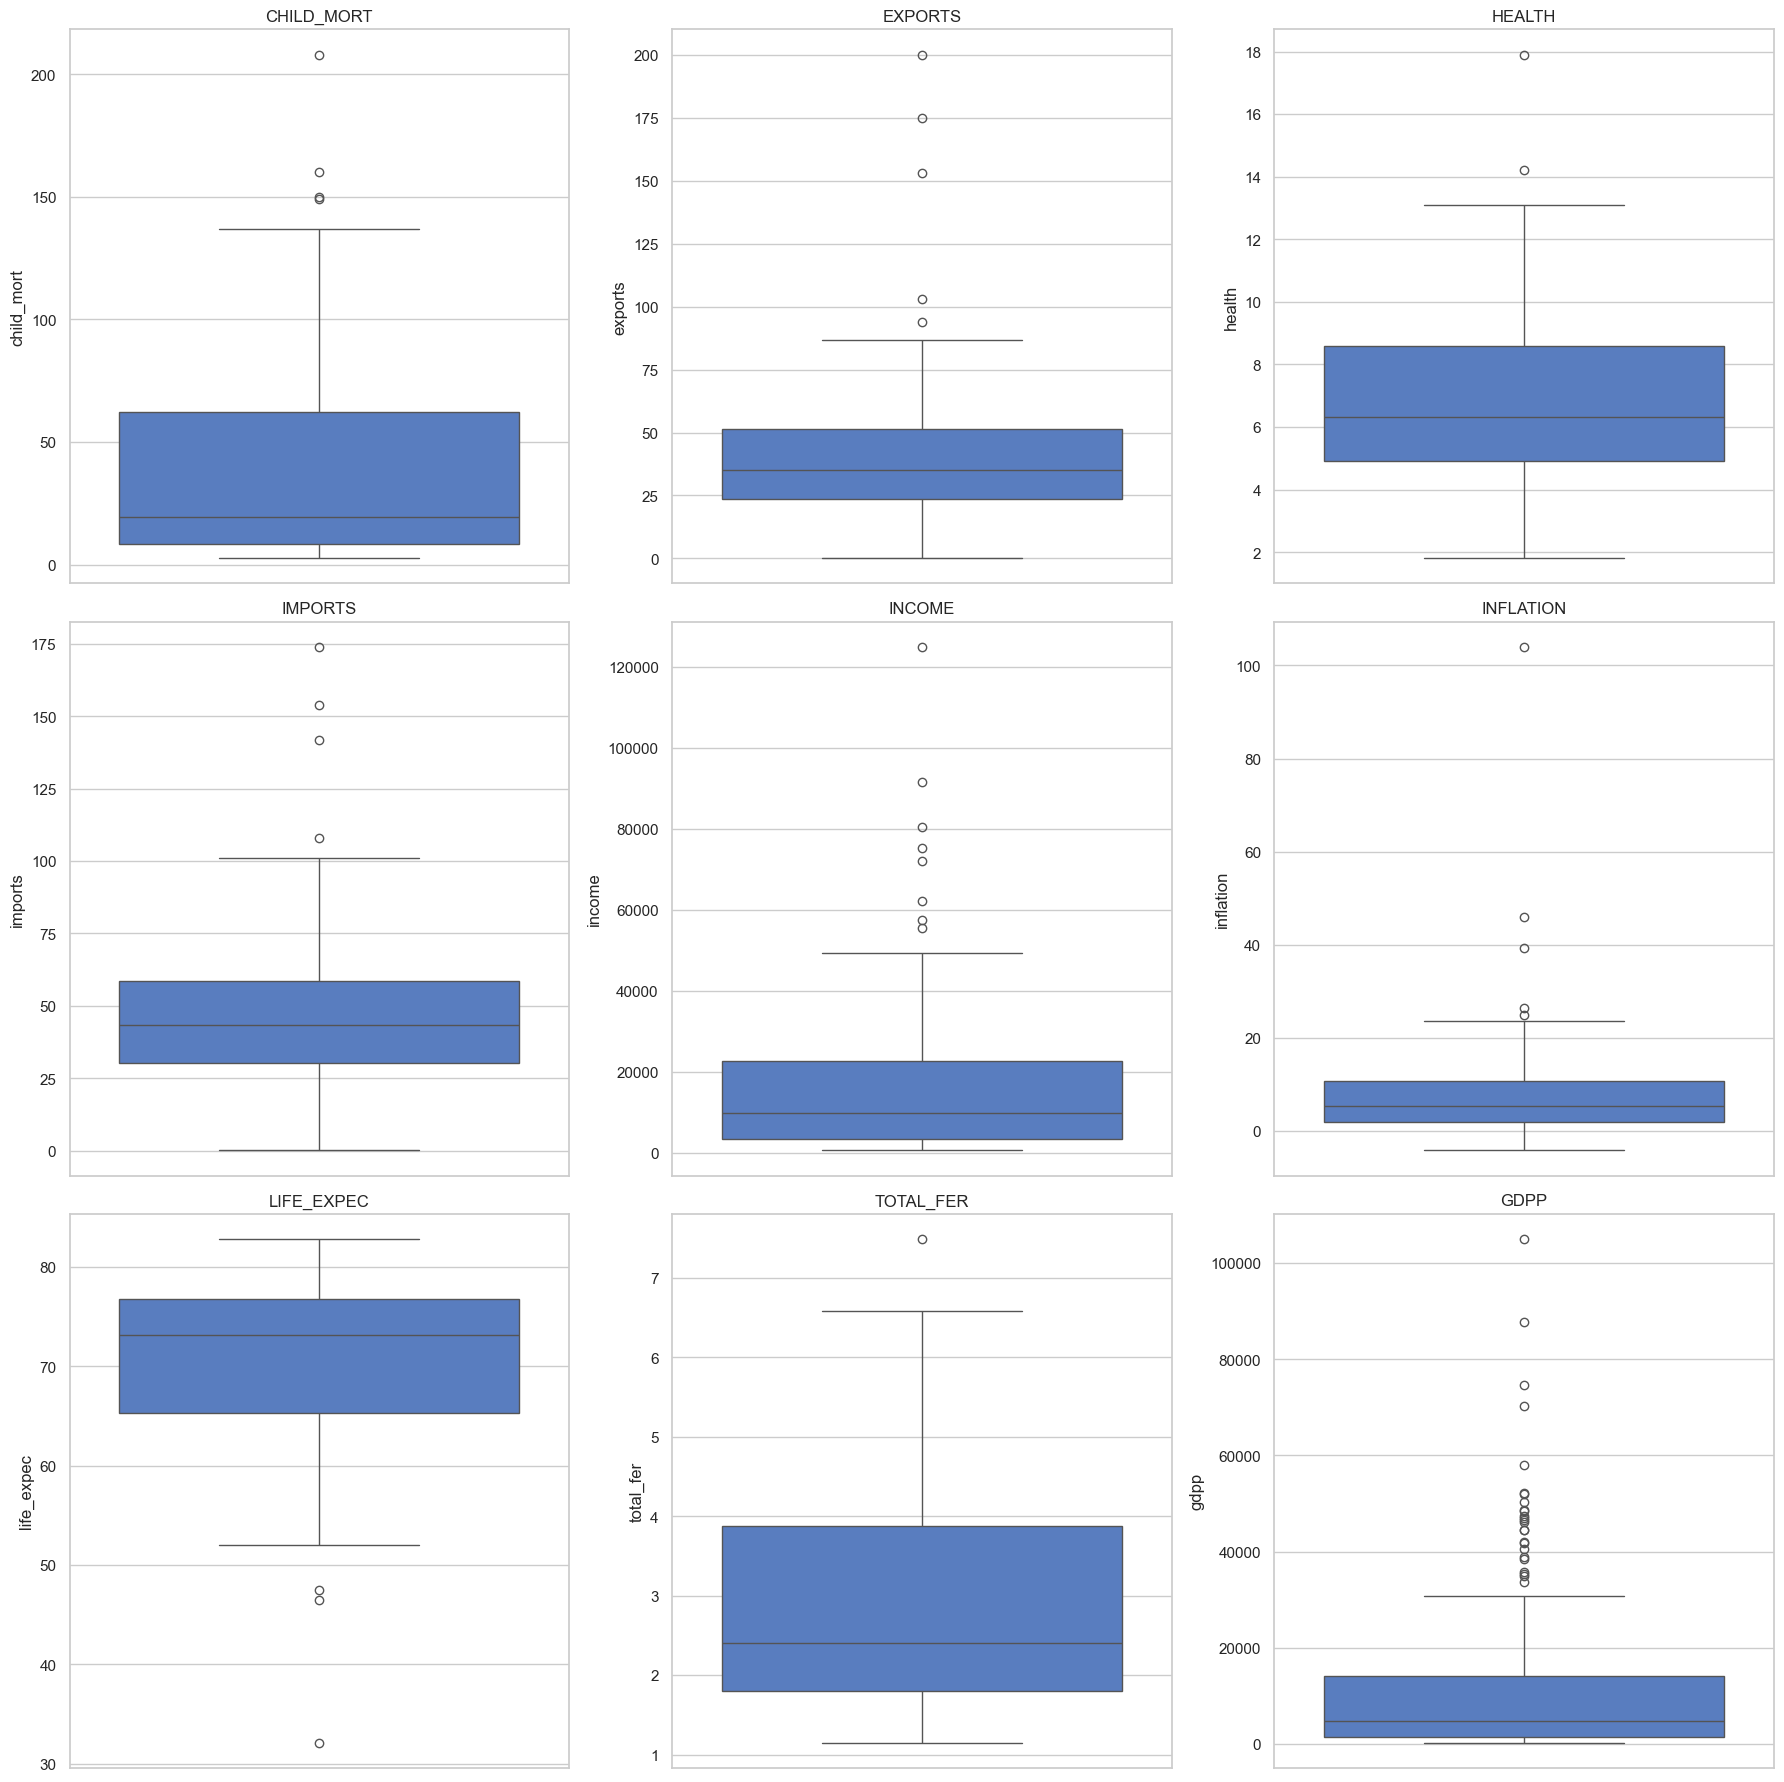

In [9]:
fig, axs = plt.subplots(3, 3, figsize=(18, 18))
for i, cols in enumerate(int_cols):
    fila = i // 3 # Calcular la fila correspondiente
    columna = i % 3 # Calcular la columna correspondiente

    sns.boxplot(data=df, y=cols, ax=axs[fila, columna])
    axs[fila, columna].set_title(f"{cols.upper()}")

plt.tight_layout()
plt.show()

### Insights
Durante el análisis de las distribuciones mediante boxplots de las variables en el dataset "Unsupervised Learning on Country Data", se descubrieron los siguientes insights:

• Se identificaron varios outliers en las distribuciones de las variables.

• Específicamente, se destacó un outlier en la variable de inflación.

• A pesar de la presencia de outliers, se decidió no eliminarlos en este caso.

• Los outliers en la variable de inflación son parte de los datos económicos de cada país y no pueden ser descartados.

• Estos datos representan aspectos fundamentales de la economía y no surgieron de la nada.

• La decisión de no eliminar los outliers resalta la importancia de comprender y analizar adecuadamente el contexto y la naturaleza de los datos antes de realizar cualquier modificación.

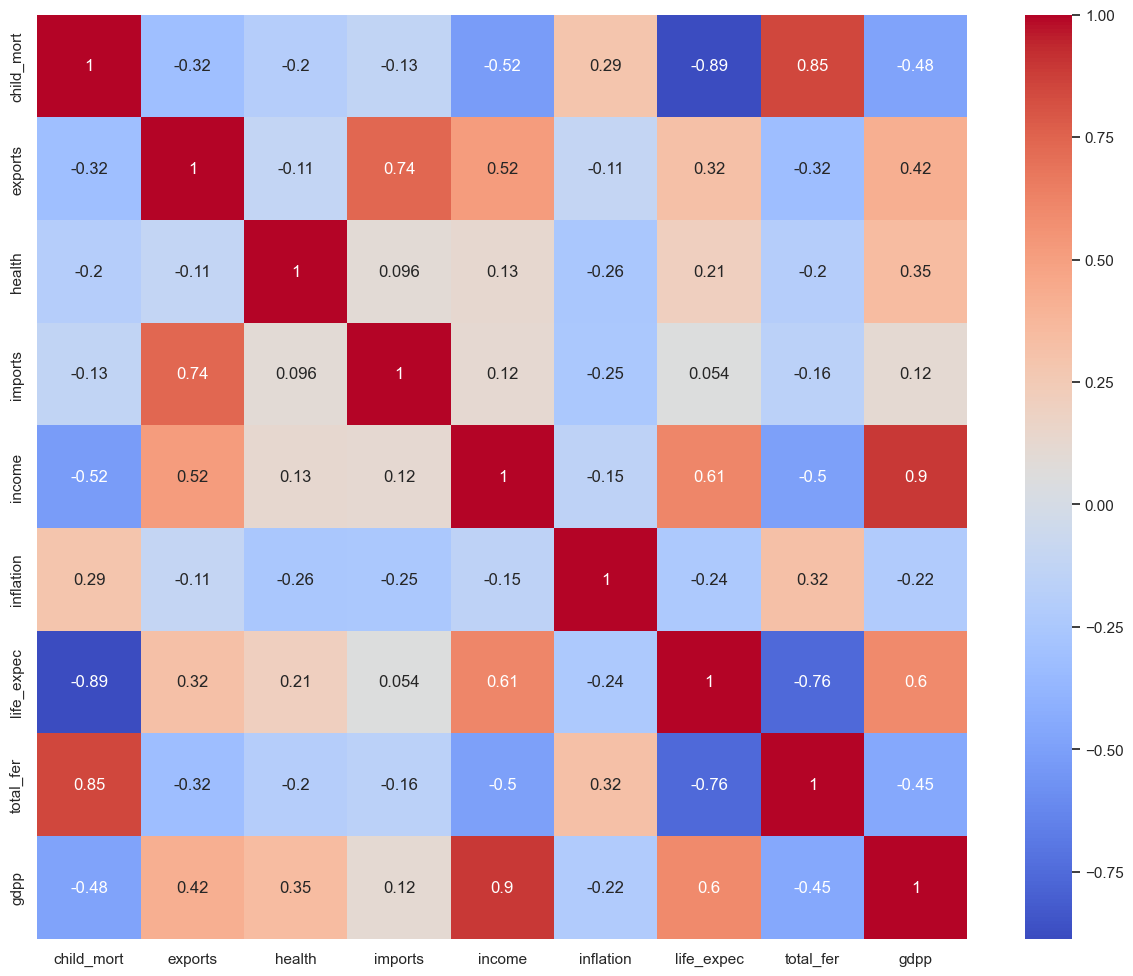

In [10]:
plt.figure(figsize=(15,12))

sns.heatmap(
    df.select_dtypes(exclude='object').corr(),
    annot=True,
    cmap='coolwarm');

### Insights
- Existe una alta correlación positiva de 0.90 entre el ingreso per cápita (income) y el producto interno bruto per cápita (gdpp).

- Se observa una alta correlación negativa de -0.89 entre la esperanza de vida (life_expec) y la tasa de mortalidad infantil (child_mort).

- Se encontró una alta correlación positiva de 0.85 entre la tasa de mortalidad infantil (child_mort) y la fertilidad total (total_fer).

- Se observa una alta correlación negativa de -0.76 entre la esperanza de vida (life_expec) y la fertilidad total (total_fer).

- Existe una correlación moderada de 0.61 entre el ingreso per cápita (income) y la esperanza de vida (life_expec).
- Se encontró una correlación moderada de 0.60 entre el producto interno bruto per cápita (gdpp) y la esperanza de vida (life_expec).

- Existe una alta correlación positiva de 0.74 entre las exportaciones (exports) e importaciones (imports).

### Conclusiones:

- La correlación positiva entre el ingreso per cápita (income) y el producto interno bruto per cápita (gdpp) respalda la idea de que un mayor ingreso económico está asociado con un mayor desarrollo económico.

- La alta correlación negativa entre la esperanza de vida (life_expec) y la tasa de mortalidad infantil (child_mort) sugiere que los países con mejores condiciones de salud tienen una menor tasa de mortalidad infantil.

- La correlación positiva entre la tasa de mortalidad infantil (child_mort) y la fertilidad total (total_fer) indica que los países con altas tasas de fertilidad total pueden enfrentar desafíos en la salud y el bienestar infantil.

- La alta correlación negativa entre la esperanza de vida (life_expec) y la fertilidad total (total_fer) sugiere que una menor fertilidad total puede estar relacionada con una mayor atención médica y una mejor calidad de vida.

- Las correlaciones moderadas entre el ingreso per cápita (income) y la esperanza de vida (life_expec), así como entre el producto interno bruto per cápita (gdpp) y la esperanza de vida (life_expec), indican que un mayor nivel de desarrollo económico puede estar asociado con una mayor esperanza de vida.

- La alta correlación positiva entre las exportaciones (exports) e importaciones (imports) indica la interdependencia y el flujo de bienes en el comercio internacional.

## Escalar datos

Escalar los datos antes del PCA mejora su rendimiento y precisión al igualar las magnitudes de las variables, lo que garantiza una contribución equitativa y una mejor captura de las variaciones relevantes.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df.drop('country', axis=1))

In [12]:
df_scaled = pd.DataFrame(df_scaled, columns=df.drop('country', axis=1).columns)

In [13]:
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


## PCA

La reducción de dimensionalidad en la preparación de datos es importante para simplificar y agilizar el análisis. Ayuda a eliminar características redundantes y poco informativas, lo que mejora la eficiencia y evita el sobreajuste. Al aplicar técnicas como PCA o LDA, se conserva la información clave en un espacio de menor dimensión.

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA()
pca.fit(df_scaled)
pca_data_scaled = pca.transform(df_scaled)
pd.DataFrame(pca_data_scaled)

,0,1,2,3,4,5,6,7,8
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597,0.383000,0.415076,-0.014148
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579,0.248919,-0.221042,0.173316
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696,-0.087214,-0.184162,0.084037
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996,-0.440835,-0.355998,-0.091339
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919,0.241978,-0.023681,0.094270
...,...,...,...,...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748,0.009059,-0.098738,0.521886,-0.497803
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581,0.097274,0.206735,-0.078805,-0.275735
164,0.498524,1.390744,-0.238526,-1.074098,1.176081,0.051607,-0.143627,-0.217590,-0.036522
165,-1.887451,-0.109453,1.109752,0.056257,0.618365,-0.540917,0.060256,0.089495,-0.096049


In [16]:
# Calcular la varianza explicada por cada componente principal
var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


In [17]:
# Cacluclar la varianza acumula en porcentaje
cum_var = np.cumsum(np.round(var, decimals=4) * 100)

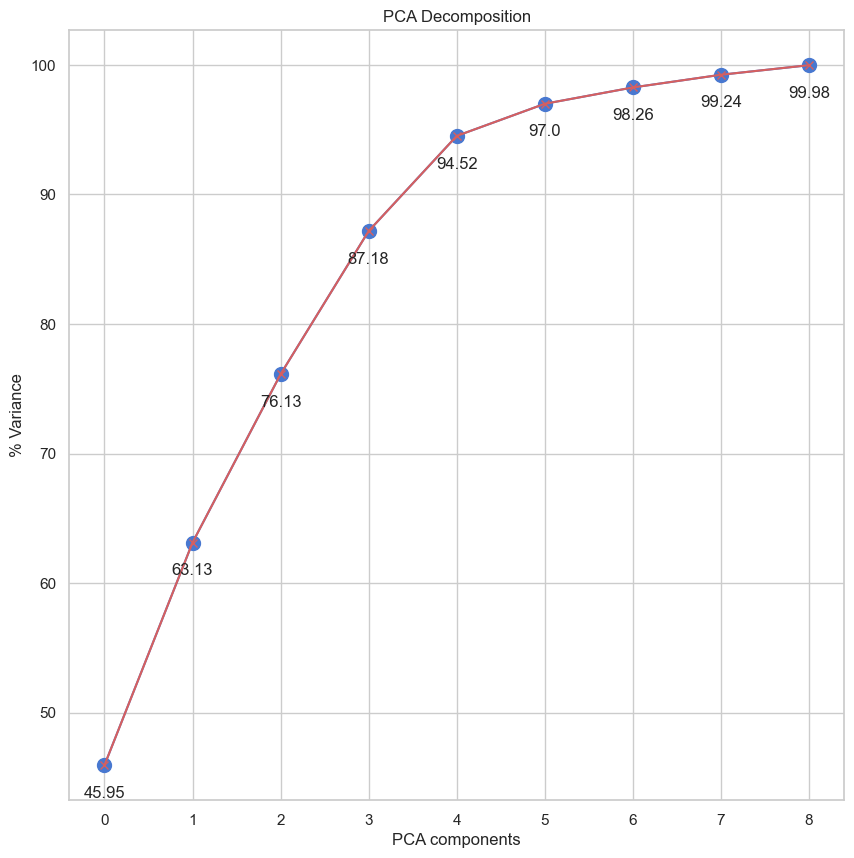

In [18]:
components = list(range(0, 9))

plt.figure(figsize=(10, 10))
# Crear una grafica para visualizar la varianza acumulada y marcar los puntos con estrellas rojas
plt.plot(cum_var, marker='o', markersize=10, color='b')

# Etiquetar el valor de la varianza acumulada en los puntos correspondientes
for s, d in zip(components, cum_var):
    plt.annotate(np.round(d, decimals=2), xy=(s, d - 2.5), ha='center')

plt.plot(components, cum_var, 'r-x')
plt.title("PCA Decomposition")
plt.xlabel("PCA components")
plt.ylabel("% Variance")
plt.show()

Al observar el gráfico, vemos que al seleccionar 4 variables del PCA, capturamos un 87.2% de la información total. Esta elección nos permitira simplificar el análisis sin perder información esencial.

In [19]:
pca_data_standard = pd.DataFrame(pca_data_scaled)
pca_data_standard.drop([4,5,6,7,8], axis=1, inplace=True)

In [20]:
pca_data_standard

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


## Importar librería para clustering

In [21]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from typing import List

## K-means

In [22]:
def plot_elbow_silhouette(K, values, title, ax):
    """
    Traces an elbow plot or a silhouette coefficient plot based on the number of clusters.
    Parameters:
    - K: A list or range of values representing the number of clusters.
    - values: A list of values corresponding to the y-axis of the plot.
    - title: The title of the plot.
    - ax: The matplotlib axes object on which the plot will be drawn.
    """
    sns.lineplot(ax=ax, x=K, y=values, linestyle='dashed', marker='o', markersize=10, color='b')
    ax.set_xlabel('K')
    ax.set_ylabel('Inertia' if 'WCSS' in title else 'Silhouette Coefficient')
    ax.set_title(title, size=15)

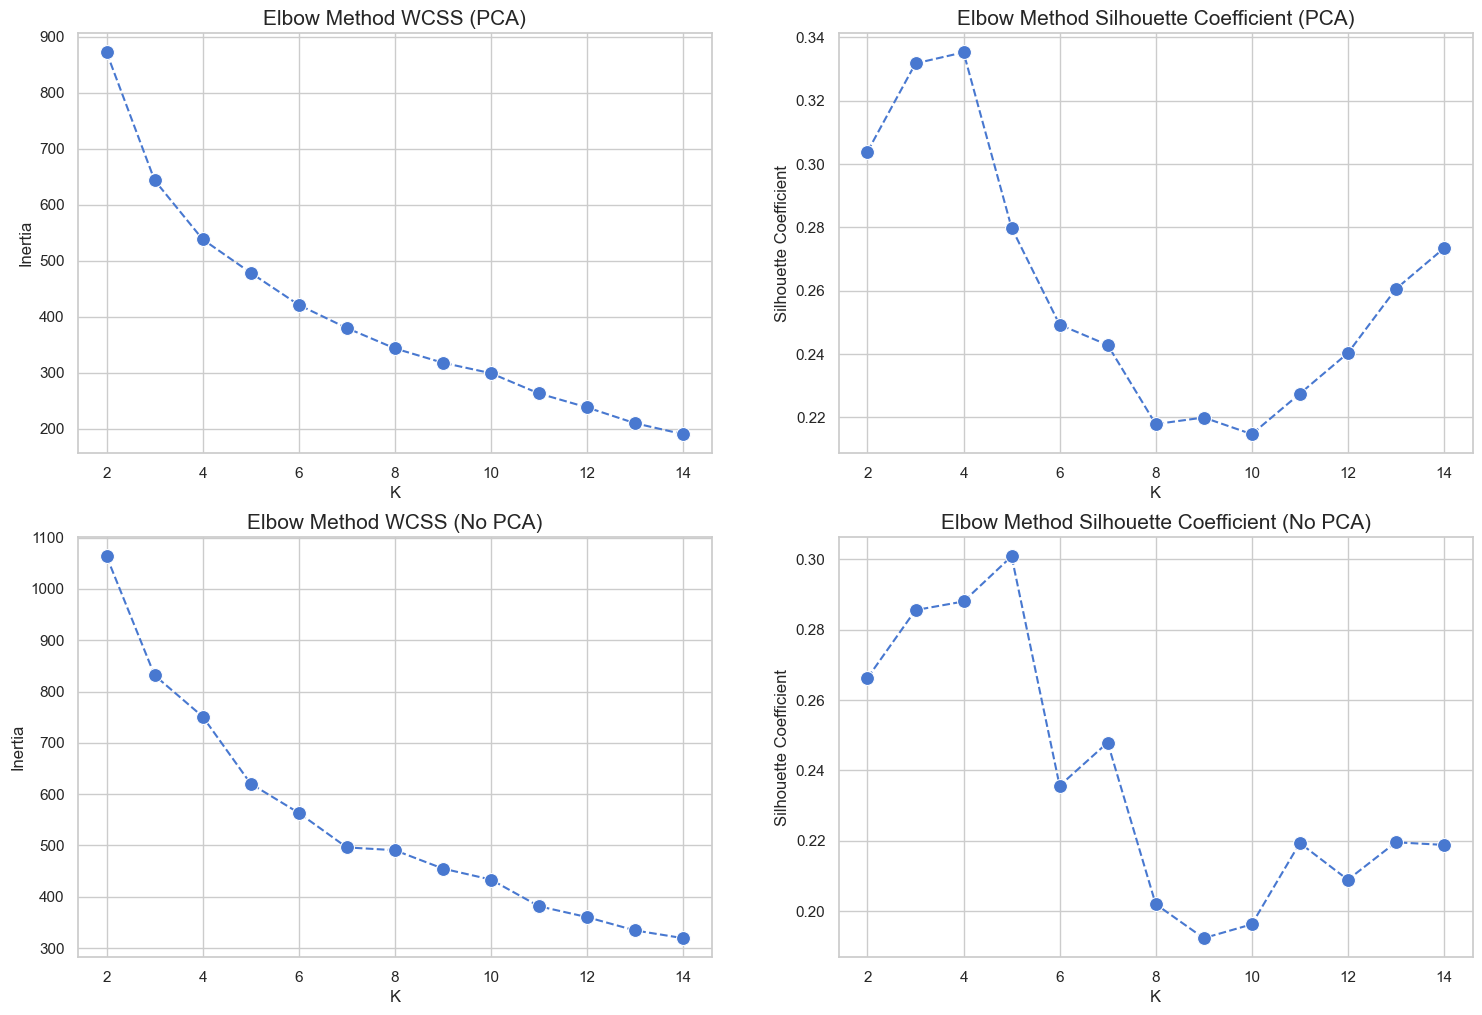

In [23]:
def analyze_cluster(data):
    """
    Performs a cluster analysis using the K-Means algorithm.
    
    Parameters:
    - data: The data on which the clustering analysis will be performed.
    
    Returns:
    - K: A list or range of values representing the number of clusters.
    - sum_of_squared_distances: A list of the sum of squared distances for each number of clusters.
    - silhouette_scores: A list of the silhouette coefficients for each number of clusters.
    """
    K = range(2, 15)
    sum_of_squared_distances = []
    silhouette_scores = []
    
    for k in K:
        km = KMeans(n_clusters=k, n_init='auto', random_state=42)
        y = km.fit_predict(data)
        sum_of_squared_distances.append(km.inertia_)
        silhouette_scores.append(silhouette_score(data, y))
    
    return K, sum_of_squared_distances, silhouette_scores

def plot_cluster_elbow_silhouette(data, title, axes, row, col):
    """
    Plot the elbow plots for WCSS and silhouette coefficients.
    
    Parameters:
    - data: The data on which the clustering analysis will be performed.
    - title: The title of the analysis. (PCA | No PCA)
    - axes: The matplotlib axes grid on which the plots will be drawn.
    - row: The row index of the current subplot.
    - col: The column index of the current subplot.
    """
    K, elbow, silhouette = analyze_cluster(data)
    
    plot_elbow_silhouette(K, elbow, f'Elbow Method WCSS ({title})', axes[row, col])
    plot_elbow_silhouette(K, silhouette, f'Elbow Method Silhouette Coefficient ({title})', axes[row, col + 1])

# Now you can call the plot_cluster_elbow_silhouette function with the appropriate parameters
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Elbow Method with PCA
plot_cluster_elbow_silhouette(pca_data_standard, 'PCA', axes, 0, 0)

# Elbow Method without PCA
plot_cluster_elbow_silhouette(df_scaled, 'No PCA', axes, 1, 0)

Al analizar los resultados de los gráficos de silueta con el método WCSS en PCA y sin PCA, se observó que el codo se encontraba entre 4 y 6 clusters. Sin embargo, el análisis de coeficiente de silueta reveló que se obtenía el porcentaje más alto cuando se utilizaban 4 clusters.

In [24]:
score = pd.DataFrame([])

def calculate_and_assign_clusters(data: pd.DataFrame=None, method: str=None, title: str=None, df: pd.DataFrame=None, k: int=None, eps: float=None, min_samples: int=None):
    """
    Calculates clusters using the specified algorithm and assigns the cluster labels to a DataFrame.

    Parameters:
    - data: The data on which the clustering analysis will be performed.
    - method: The clustering algorithm to be used ('kmeans', 'hierarchical', or 'dbscan').
    - title: The title of the analysis ('PCA', or 'No PCa').
    - df: The DataFrame to which the cluster labels will be assigned.
    - k: The number of clusters to be generated (applicable for 'kmeans' and 'hierarchical').
    - eps: The maximum distance between two samples for them to be considered in the same neighborhood (applicable for 'dbscan').
    - min_samples: The number of samples in a neighborhood for a point to be considered as a core point (applicable for 'dbscan').
    """

    if method == 'kmeans':
        # Perform K-Means clustering
        km = KMeans(n_clusters=k, n_init='auto', random_state=42)
        y = km.fit_predict(data)

        if title == 'No PCA':
            df['k_means'] = y
        else:
            df['k_means_pca'] = y

    elif method == 'hierarchical':
        # Perform hierarchical clustering
        hc = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
        y = hc.fit_predict(data)
        if title == 'No PCA':
            df['hc'] = y
        else:
            df['hc_pca'] = y

    elif method == 'dbscan':
        # Perform DBSCAN clustering
        dbscan_train = DBSCAN(eps=eps, min_samples=min_samples)
        y = dbscan_train.fit_predict(data)
        if title == 'No PCA':
            df['dbscan'] = y
        else:
            df['dbscan_pca'] = y

    # Calculate and print the silhouette score
    print('silhouette_score', title, ':', silhouette_score(data, y))

    score[method + '' + title] = [silhouette_score(data, y)]

In [25]:
kmeans_pca_score = calculate_and_assign_clusters(pca_data_standard,'kmeans','PCA',df,4)
kmeans_score = calculate_and_assign_clusters(df_scaled,'kmeans','No PCA',df,4)

silhouette_score PCA : 0.3352960060223144
silhouette_score No PCA : 0.2880471307804802


Al analizar los resultados de los gráficos de silueta con el método WCSS en PCA y sin PCA, se observó que el codo se encontraba entre 4 y 6 clusters. Sin embargo, el análisis de coeficiente de silueta reveló que se obtenía el porcentaje más alto cuando se utilizaban 4 clusters.

## Hierarchical Clustering

### PCA

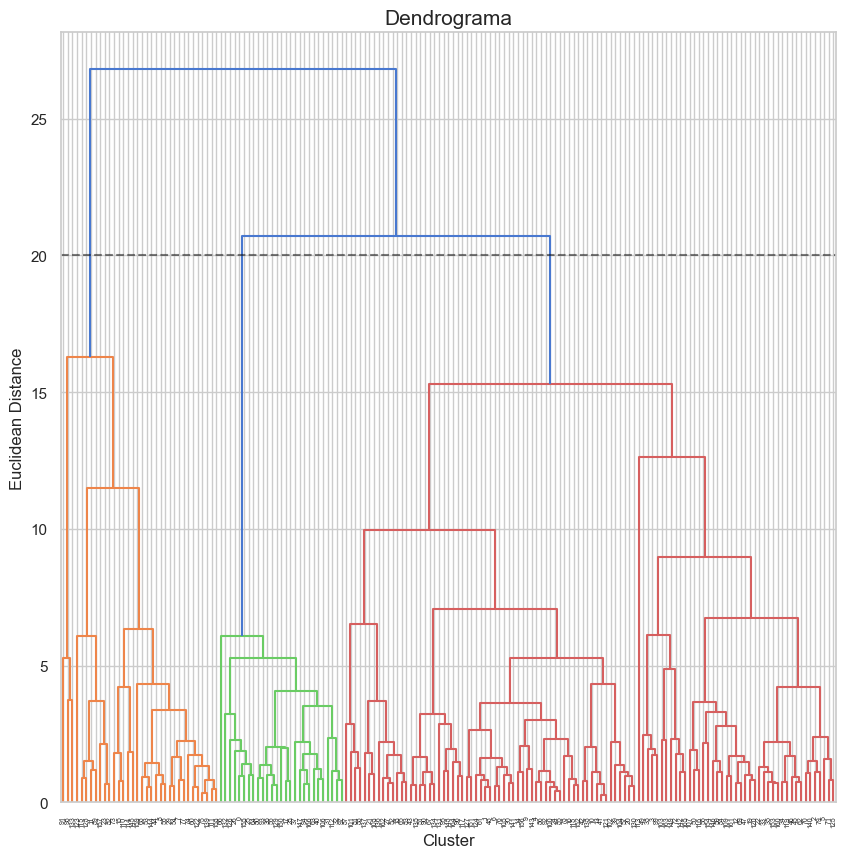

In [26]:
fig = plt.figure(figsize=(10, 10))

dendrogram_plot = dendrogram(linkage(pca_data_scaled, method='ward'))
plt.xlabel("Cluster")
plt.ylabel('Euclidean Distance')
plt.title("Dendrograma", size=15)
for i in [80,45,20]:
    plt.hlines(y=i,xmin=0,xmax=5000,linestyles='dashed', alpha=.5, colors='black')
plt.show()

In [27]:
for i in range(2,7):
    hc = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='ward')
    y_hc = hc.fit_predict(pca_data_scaled)
    print(f'{i}_cluster :',silhouette_score(pca_data_scaled, y_hc))

2_cluster : 0.3153134331018189
3_cluster : 0.24563001303300652
4_cluster : 0.24811891847692066
5_cluster : 0.2193301598939687
6_cluster : 0.217674980548791


In [28]:
calculate_and_assign_clusters(pca_data_scaled,'hierarchical','PCA',df,2)

silhouette_score PCA : 0.3153134331018189


### Sin PCA


In [29]:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_data_standard)

print("Silhouette Score: ", silhouette_score(pca_data_standard, y_hc))

df['hc_pca'] = y_hc

Silhouette Score:  0.3070110704080526


## SIN PCA

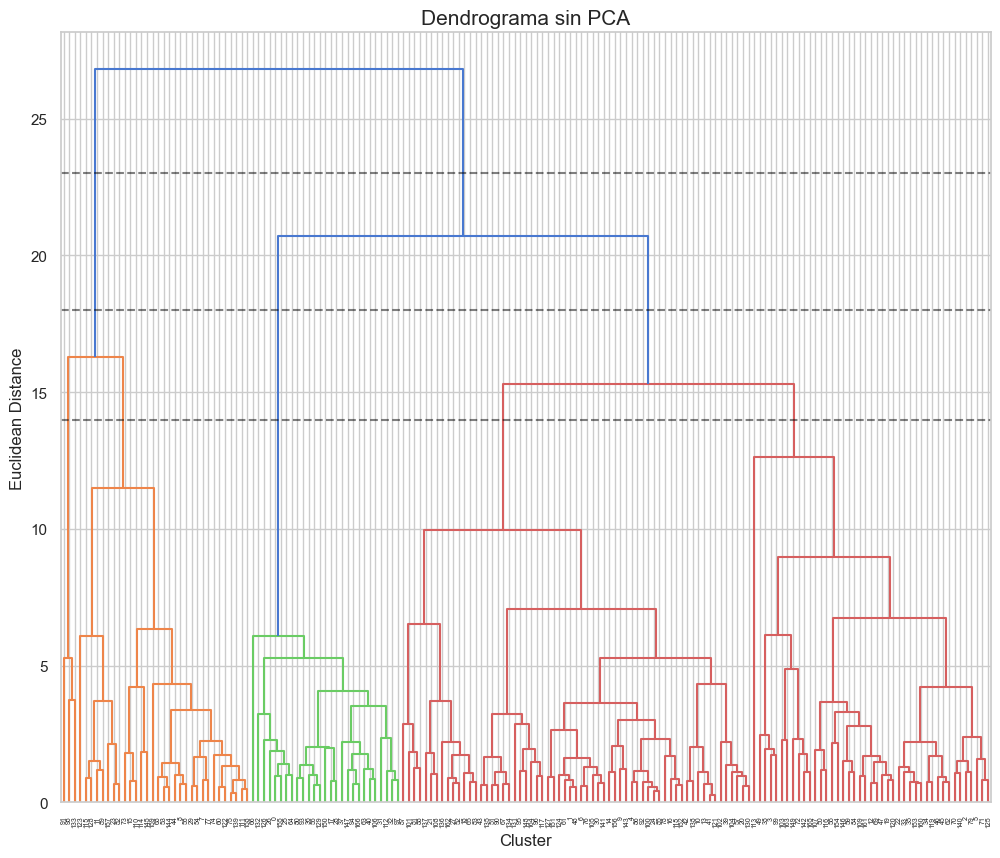

In [30]:
fig = plt.figure(figsize=(12, 10))

dendrogram_plot = dendrogram(linkage(df_scaled, method='ward'))
plt.xlabel("Cluster")
plt.ylabel('Euclidean Distance')
plt.title("Dendrograma sin PCA", size=15)
for i in [23,18,14]:
    plt.hlines(y=i,xmin=0,xmax=5000,linestyles='dashed', alpha=.5, colors='black')
plt.show()

In [31]:
for i in range(2,7):
    hc = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='ward')
    y_hc = hc.fit_predict(df_scaled)
    print(f'{i}_cluster :',silhouette_score(df_scaled, y_hc))

2_cluster : 0.3153134331018189
3_cluster : 0.24563001303300652
4_cluster : 0.24811891847692066
5_cluster : 0.2193301598939687
6_cluster : 0.217674980548791


In [32]:
hc_score = calculate_and_assign_clusters(df_scaled,'hierarchical','No PCA',df,2)

silhouette_score No PCA : 0.3153134331018189


## DBSCAN

PCA

In [33]:
from sklearn.neighbors import NearestNeighbors

# Crear una instancia del modelo NearestNeighbors con n_neighbors=2
neighbors =  NearestNeighbors(n_neighbors=2)

# Ajustar el modelo NearestNeighbors utilizando los datos transformados mediante PCA
neighbors_fit = neighbors.fit(pca_data_standard)

# Calcular las distancias y los índices de los vecinos más cercanos
distances, indeces = neighbors_fit.kneighbors(pca_data_standard)

In [34]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

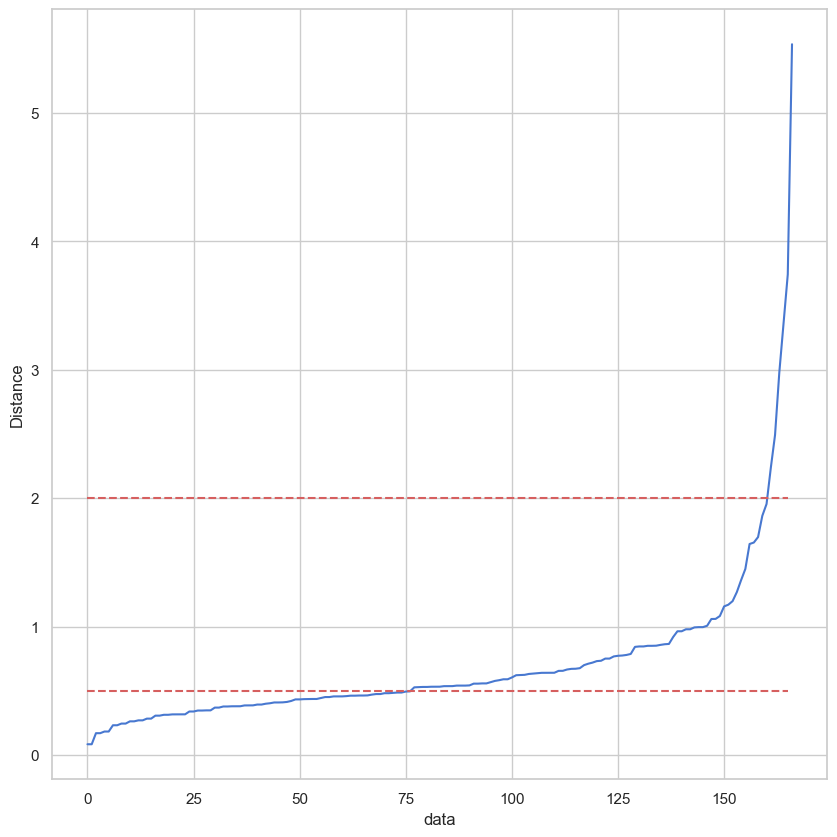

In [35]:
plt.figure(figsize=(10, 10))
plt.plot(distances)

plt.xlabel('data')
plt.ylabel('Distance')

plt.hlines(y=2 ,xmin=0,xmax=165, linestyles="dashed", colors='r')
plt.hlines(y=0.5 ,xmin=0,xmax=165, linestyles="dashed", colors='r')
plt.show()

Exploramos el rango de 0.5 a 2 en el gráfico de rodilla para encontrar el mejor valor de epsilon. Este valor óptimo nos permite identificar cambios importantes en las distancias y optimizar el algoritmo de clustering con DBSCAN.

In [36]:
# Crear un arreglo de valores de epsilon desde 0.5 hasta 2 con paso de 0.1

eps_values = np.arange(0.5, 2, 0.1)

# Crear un arreglo de valores de min_samples desde 3 hasta 12

min_samples = np.arange(3, 12)

In [37]:
from itertools import product

# Generar todas las combinaciones posibles entre los valores de eps_values y min_samples
dbscan_params = list(product(eps_values, min_samples))
no_of_clusters = []
sil_scores = []

for p in dbscan_params:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_data_standard)
    try:
        sil_scores.append(silhouette_score(pca_data_standard, y_dbscan))
    except:
        sil_scores.append(0)
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [38]:
df_params_tunning = pd.DataFrame.from_records(dbscan_params, columns=['Eps', 'Min_samples'])
df_params_tunning['sil_scores'] = sil_scores
df_params_tunning['n_clusters'] = no_of_clusters

In [39]:
df_params_tunning

,Eps,Min_samples,sil_scores,n_clusters
0,0.5,3,-0.290614,8
1,0.5,4,-0.346912,8
2,0.5,5,-0.270847,3
3,0.5,6,-0.270847,3
4,0.5,7,-0.192021,2
...,...,...,...,...
130,1.9,7,0.508155,2
131,1.9,8,0.508155,2
132,1.9,9,0.508155,2
133,1.9,10,0.490310,2


In [40]:
pivot_1 = pd.pivot_table(df_params_tunning, values='sil_scores', columns='Eps', index='Min_samples')


pivot_2 = pd.pivot_table(df_params_tunning, values='n_clusters', columns='Eps', index='Min_samples')

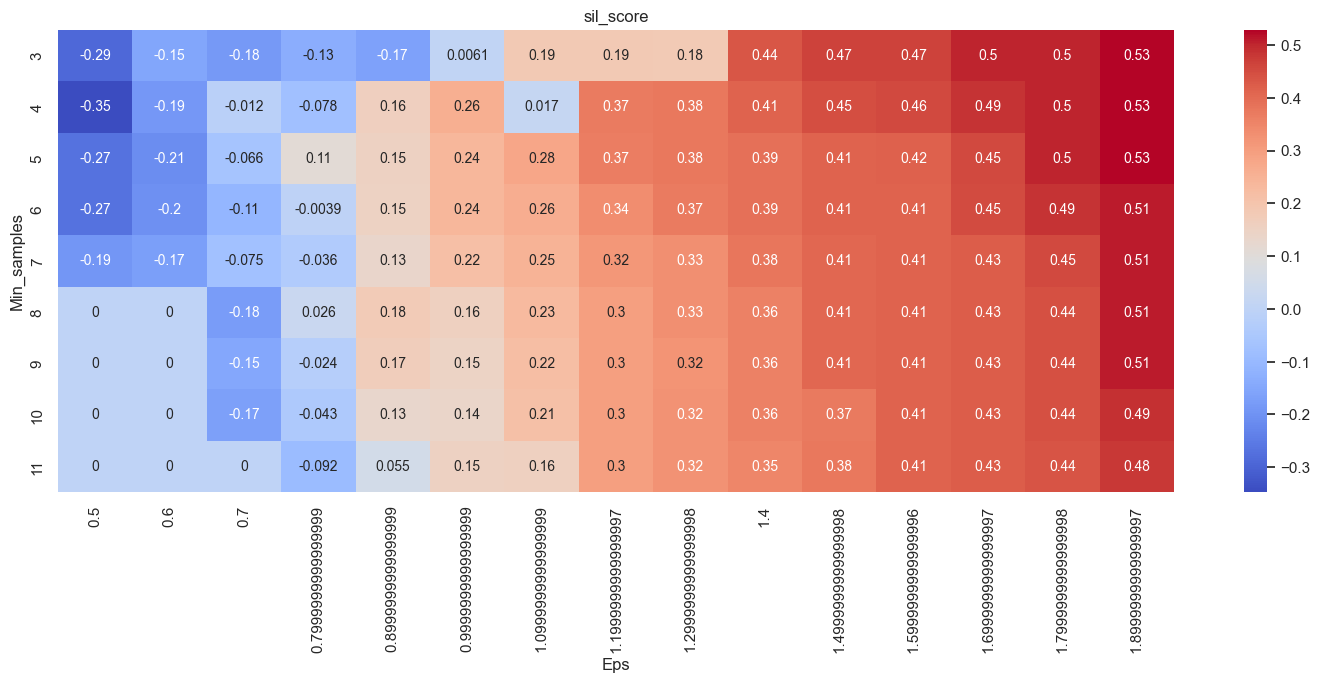

In [41]:
plt.figure(figsize=(18,6))
sns.heatmap(pivot_1,annot=True, annot_kws={'size':10}, cmap='coolwarm');
plt.title('sil_score')
plt.show()

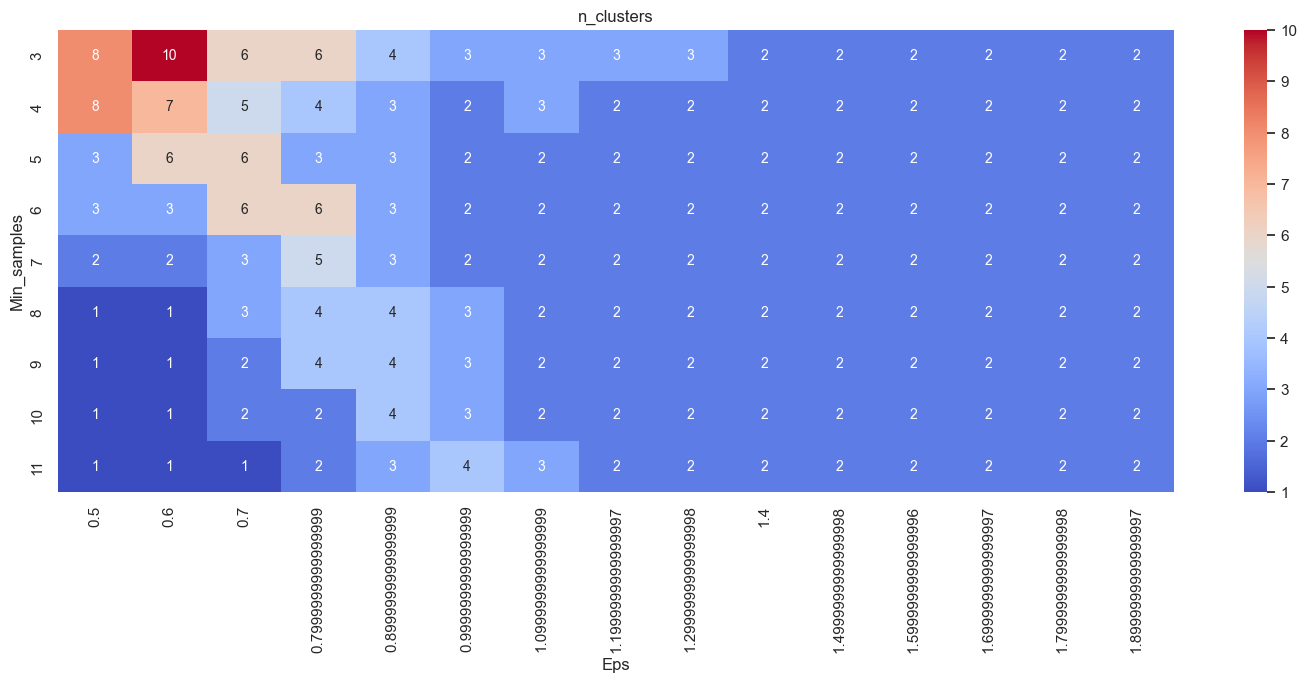

In [42]:
plt.figure(figsize=(18,6))
sns.heatmap(pivot_2,annot=True, annot_kws={'size':10}, cmap='coolwarm');
plt.title('n_clusters')
plt.show()

En el análisis de los gráficos:

- El gráfico de sil_score indica que un Eps de 1.89 tiene un alto índice de silueta, lo que sugiere buena calidad de los clusters.

- Sin embargo, el gráfico de n_clusters muestra que el número de clusters es bajo, posiblemente con solo 1 cluster y outliers.

- Esta discrepancia indica que la configuración con Eps de 1.89 no sería útil para la predicción, a pesar del alto índice de silueta.

- Por otro lado, con un Eps de 1.19, se obtiene un índice de silueta de 0.18 y se observan 3 clusters en el gráfico de n_clusters.

- Esta configuración parece más adecuada, con un número razonable de clusters y un índice de silueta aceptable.

In [43]:
dbscan_pca_score = calculate_and_assign_clusters(
    data=pca_data_standard,
    method='dbscan',
    title='PCA',
    df=df,
    eps=1.2,
    min_samples=3)

silhouette_score PCA : 0.1859117573078435


## Sin PCA

In [44]:
from sklearn.neighbors import NearestNeighbors
# Crear una instancia del modelo NearestNeighbors con n_neighbors=2
neighbors = NearestNeighbors(n_neighbors=2)

# Ajustar el modelo NearestNeighbors utilizando los datos transformados mediante PCA
neighbors_fit = neighbors.fit(df_scaled)

# Calcular las distancias y los índices de los vecinos más cercanos
distances, indices = neighbors_fit.kneighbors(df_scaled)

In [45]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

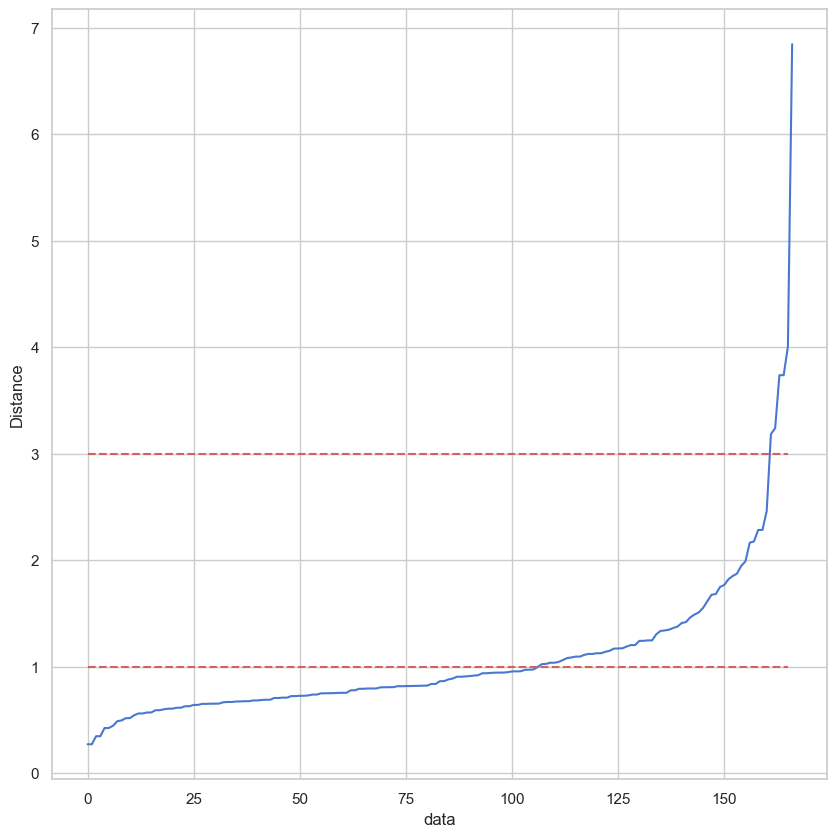

In [46]:
plt.figure(figsize=(10, 10))
plt.plot(distances)

plt.xlabel('data')
plt.ylabel('Distance')

plt.hlines(y=3 ,xmin=0,xmax=165, linestyles="dashed", colors='r')
plt.hlines(y=1 ,xmin=0,xmax=165, linestyles="dashed", colors='r')
plt.show()

Al realizar el algoritmo de DBSCAN en el dataset sin aplicar PCA, observamos en nuestro gráfico de rodilla que los datos varían en un rango de 1 a 3. Esto indica que existe una posible variación en el número de clusters óptimos dentro de ese rango. Por lo tanto, debemos considerar diferentes valores de Eps y min_samples dentro de ese rango basado en el orden de las distancias.

In [47]:
# Crear un arreglo de valores de epsilon desde 0.5 hasta 2 con paso de 0.1
eps_values = np.arange(1, 3, 0.1)

# Crear un arreglo de valores de min_samples desde 3 hasta 12
min_samples = np.arange(3, 12)

In [48]:
from itertools import product

# Generar todas las combinaciones posibles entre los valores de eps_values y min_samples
dbscan_params = list(product(eps_values, min_samples))
no_of_clusters = []
sil_scores = []

for p in dbscan_params:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_scaled)
    try:
        sil_scores.append(silhouette_score(df_scaled, y_dbscan))
    except:
        sil_scores.append(0)
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [49]:
df_params_tunning = pd.DataFrame.from_records(dbscan_params, columns=['Eps','Min_samples'])
df_params_tunning['sil_score'] = sil_scores
df_params_tunning['n_clusters'] = no_of_clusters

In [50]:
df_params_tunning

,Eps,Min_samples,sil_score,n_clusters
0,1.0,3,0.011714,7
1,1.0,4,-0.031864,5
2,1.0,5,-0.024819,4
3,1.0,6,0.009157,3
4,1.0,7,-0.020091,3
...,...,...,...,...
175,2.9,7,0.557682,2
176,2.9,8,0.557682,2
177,2.9,9,0.557682,2
178,2.9,10,0.557682,2


In [51]:
pivot_1 = pd.pivot_table(df_params_tunning, values='sil_score', columns='Eps', index='Min_samples')

pivot_2 = pd.pivot_table(df_params_tunning, values='n_clusters', columns='Eps', index='Min_samples')

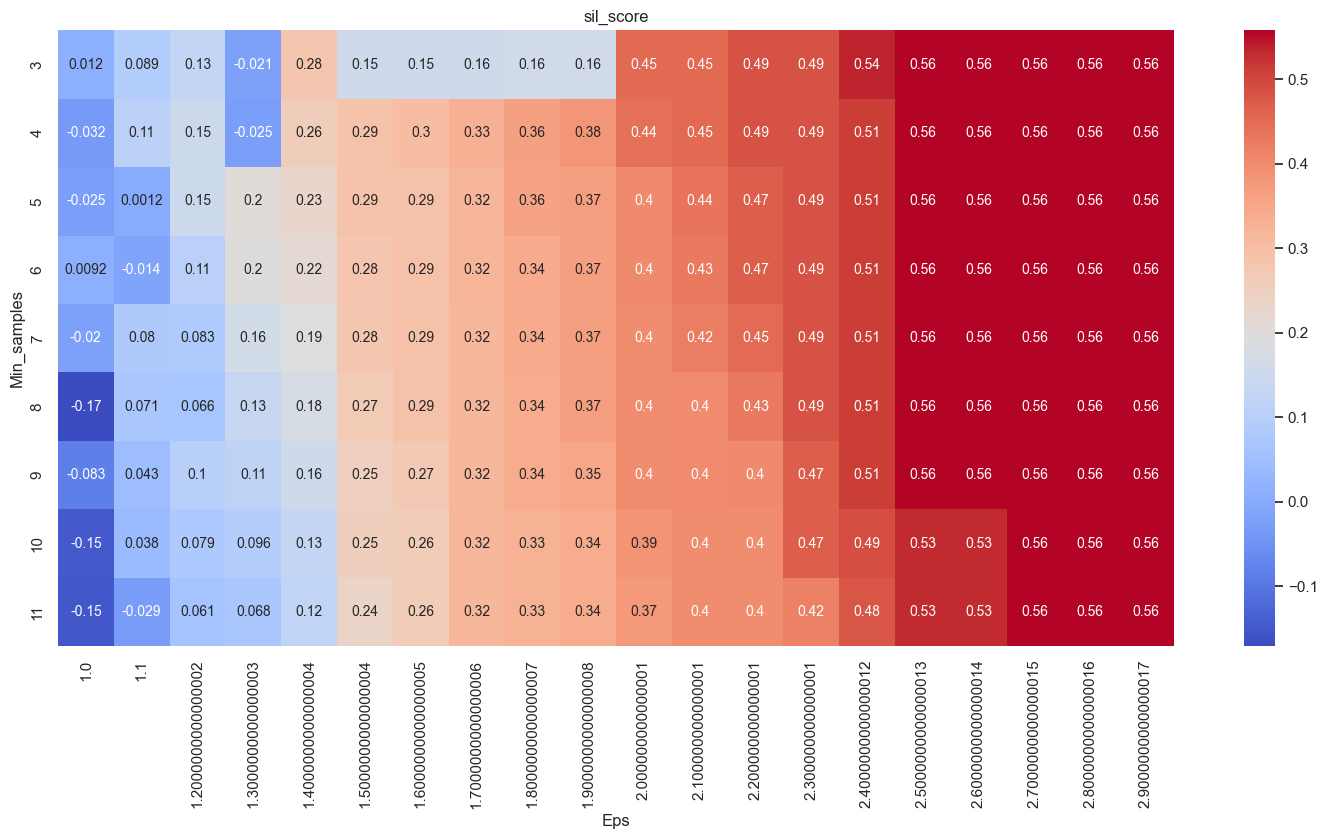

In [52]:
plt.figure(figsize=(18,8))
sns.heatmap(pivot_1,annot=True, annot_kws={'size':10}, cmap='coolwarm');
plt.title('sil_score')
plt.show()

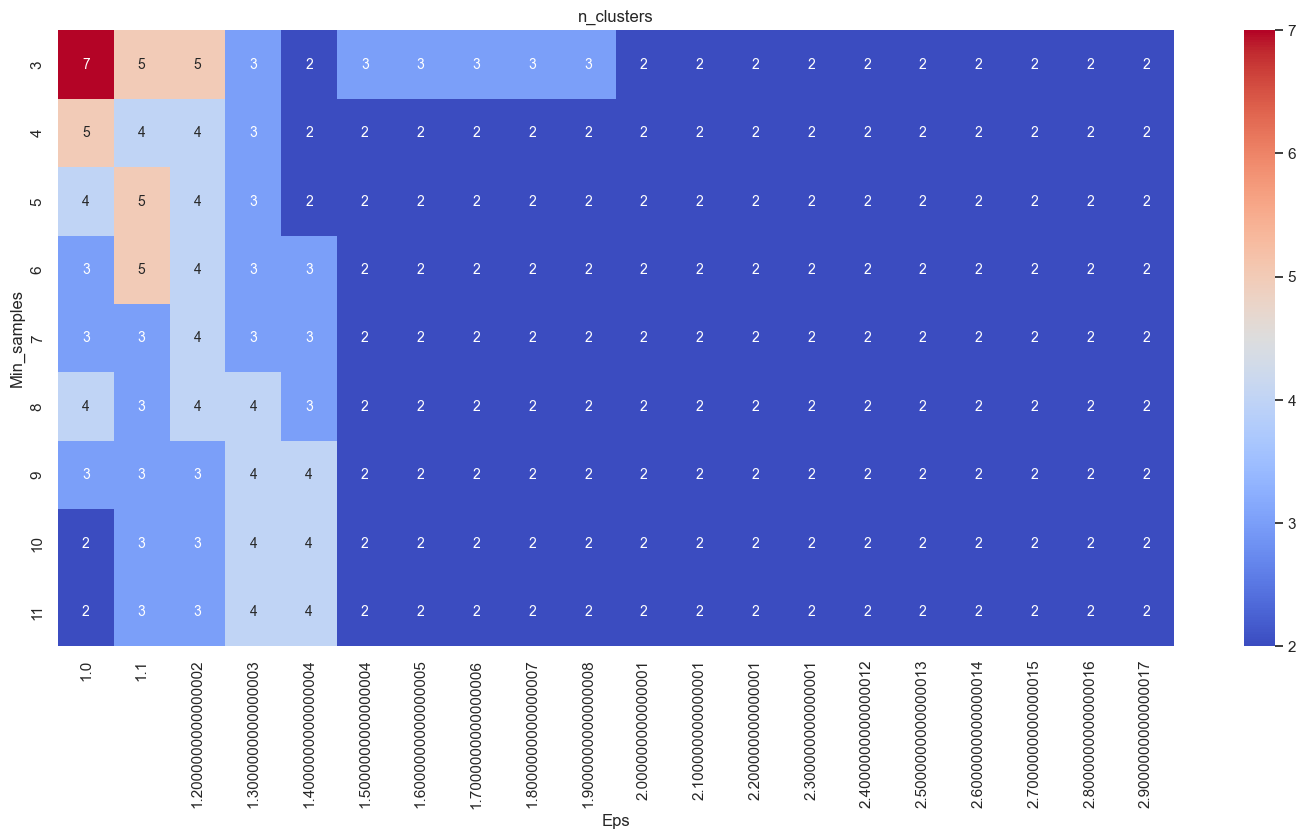

In [53]:
plt.figure(figsize=(18,8))
sns.heatmap(pivot_2,annot=True, annot_kws={'size':10}, cmap='coolwarm');
plt.title('n_clusters')
plt.show()

In [54]:
dbscan_score = calculate_and_assign_clusters(
    data=df_scaled,
    method='dbscan',
    title='No PCA',
    df=df,
    eps=1.4,
    min_samples=6)

silhouette_score No PCA : 0.21539651251091044


In [55]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,2,1,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0,0,0,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0,1,0,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,2,1,0,-1,-1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,0,0,0,0,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,0,1,0,-1,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,0,0,0,0,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2,2,1,0,0,0


## Evaluacion de resultados

In [56]:
score.values

array([[0.33529601, 0.28804713, 0.31531343, 0.31531343, 0.18591176,
        0.21539651]])

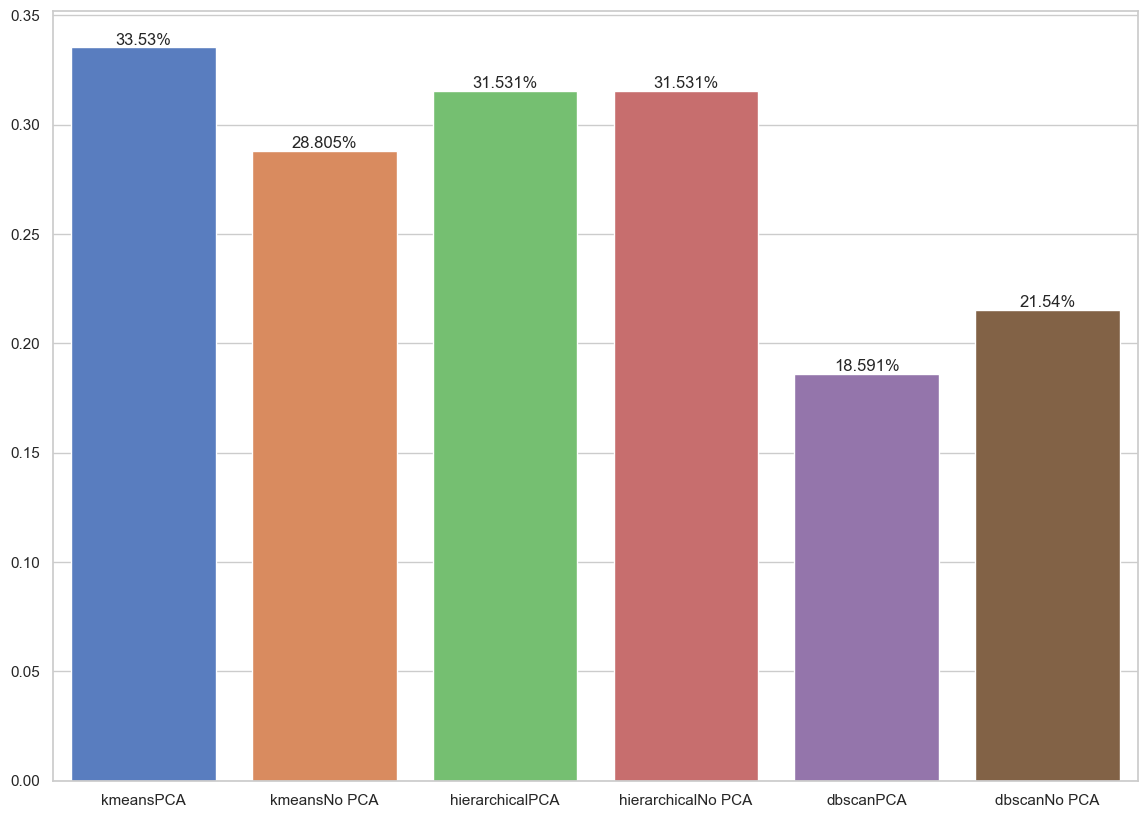

In [57]:
plt.figure(figsize=(14,10))
sns.barplot(score)

for i, value in enumerate(score.values[0]):
    plt.annotate(str(f'{(value*100).round(3)}%'), xy=(i, value), ha='center', va='bottom')

In [58]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca',
       'k_means', 'hc_pca', 'hc', 'dbscan_pca', 'dbscan'],
      dtype='object')

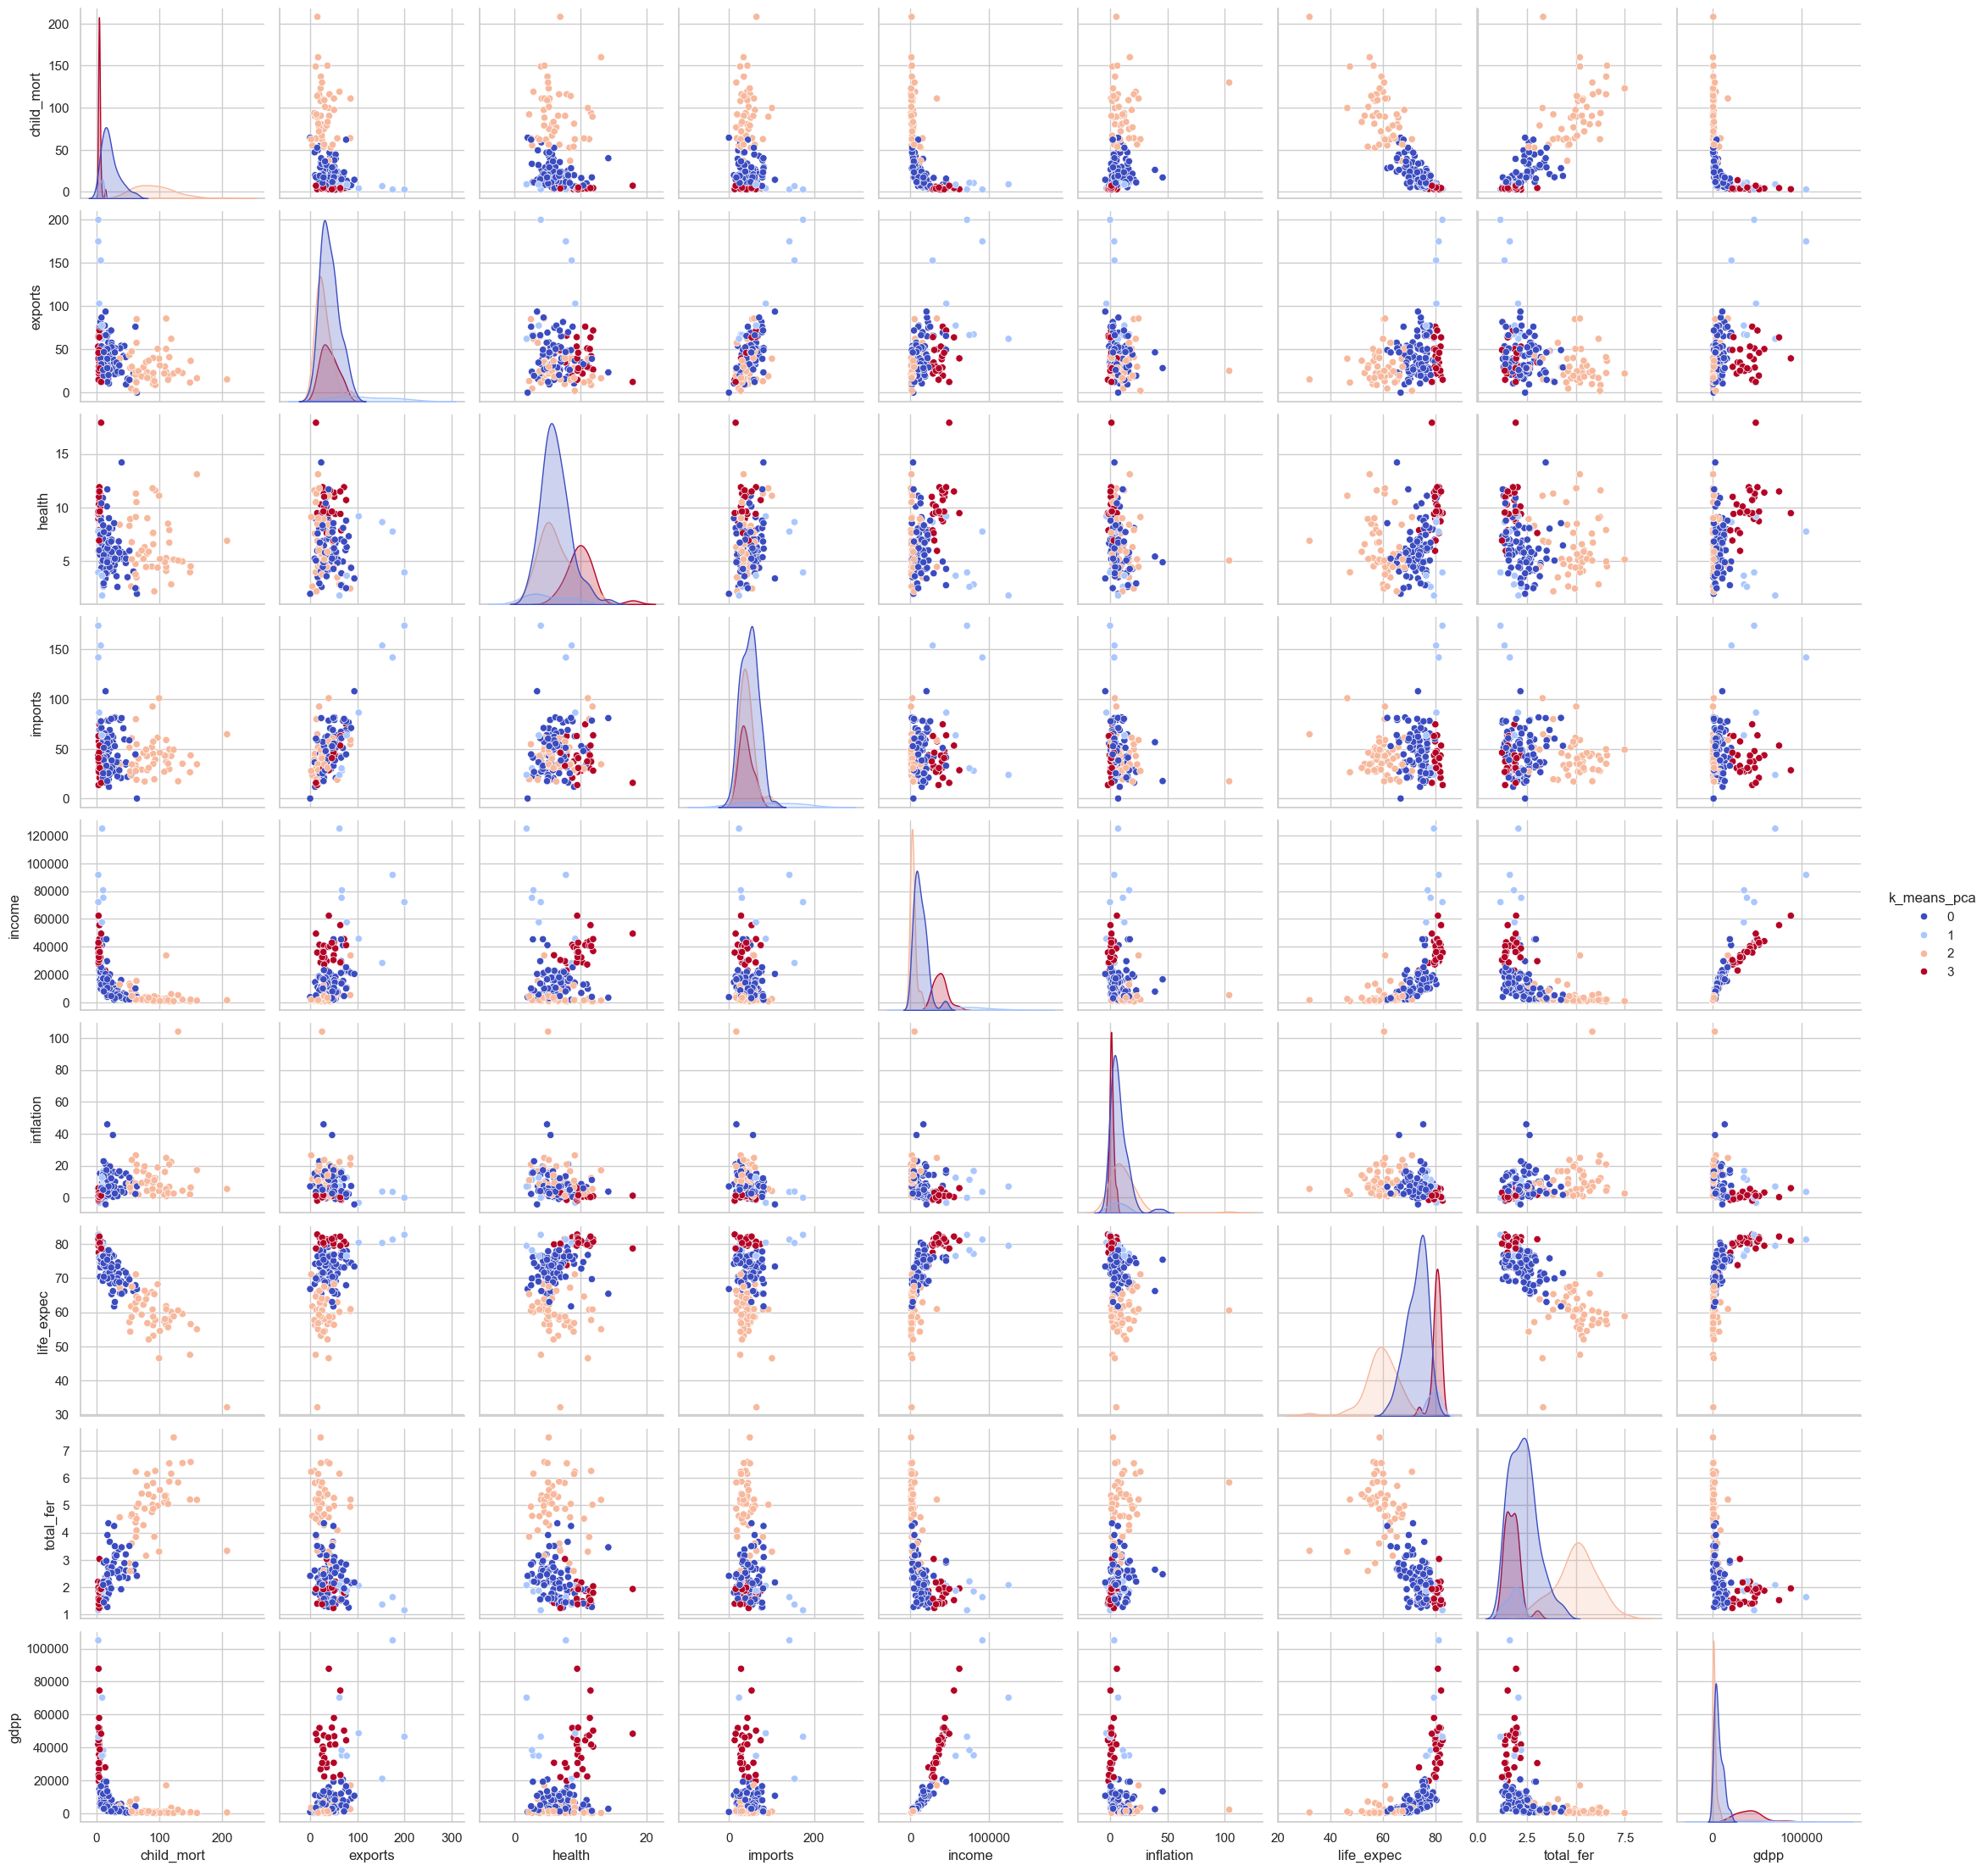

In [59]:
sns.pairplot(data=df[[
    'child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca'
]], hue='k_means_pca', palette='coolwarm')
plt.show()

Después de generar el pairplot, se observa que hay distribuciones donde están bien segmentadas en varios grupos. Sin embargo, para continuar nuestra investigación, nos enfocaremos en analizar las variables cruzadas de GDP per cápita (GDPP) y tasa de mortalidad infantil (Child Mortality).

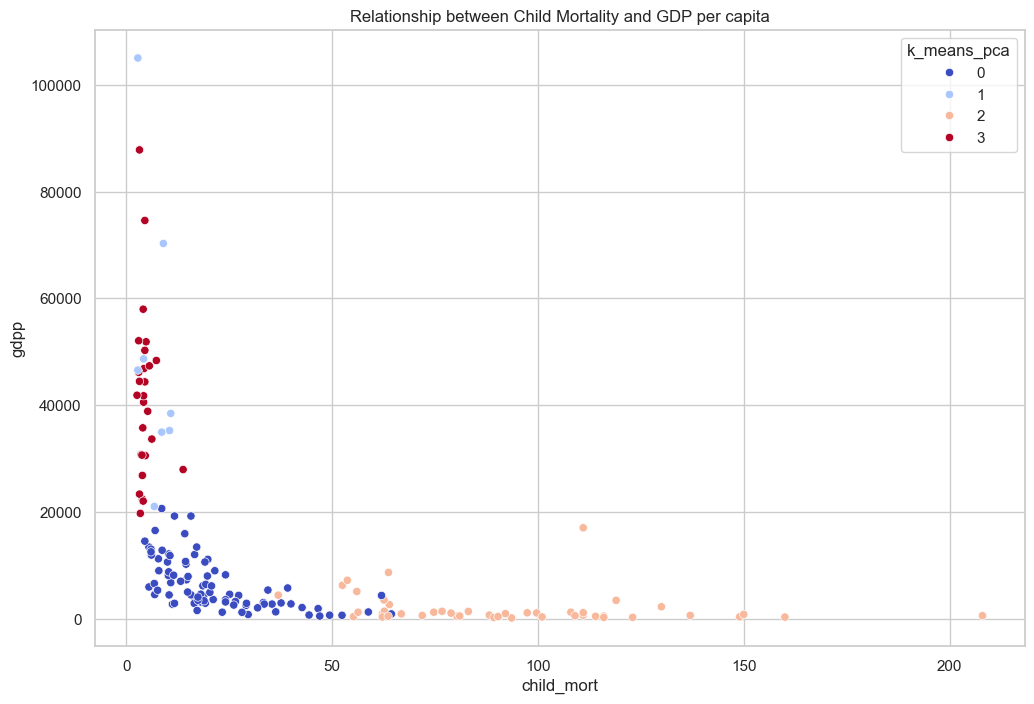

In [60]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='child_mort', y='gdpp', hue='k_means_pca', palette='coolwarm')
plt.title('Relationship between Child Mortality and GDP per capita')
plt.show()

In [61]:
df[df['k_means_pca'] == 3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,3,1,0,1,0,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,3,1,0,1,0,1
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,3,0,0,0,0,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,3,1,0,1,0,-1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,3,1,0,1,0,1
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,3,1,0,0,0,1
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,3,1,0,0,0,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,3,1,0,1,0,1
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,3,1,0,1,0,1
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,3,1,0,1,0,1


- En nuestro dashboard, encontramos una gráfica de dispersión que representa la ubicación de los países en función de su tasa de mortalidad infantil (Child Mortality) y su Producto Interno Bruto per cápita (GDPP). Observamos que Haití se destaca como el país con la mayor mortalidad infantil y un GDPP muy bajo.

- En el gráfico de barras de nuestro dashboard, se muestran los 10 países con la mayor mortalidad infantil, teniendo a Haití con la tasa más alta. Es importante destacar que la mayoría de estos países se encuentran en África.

- En el gráfico del mapamundi en nuestro dashboard, se han segmentado los países según su necesidad de ayuda inmediata utilizando colores. Los países verdes no necesitan ayuda, los amarillos tienen una necesidad media y los rojos tienen una necesidad alta.

In [62]:
import pycountry
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


def get_alpha_3(location):
    try:
        return pycountry.countries.get(name=location).alpha_3
    except:
        return None



df_map = df.copy()
df_map['iso_alpha'] = df['country'].apply(lambda x: get_alpha_3(x))

iso3_to_iso2 = {c.alpha_3: c.alpha_2 for c in pycountry.countries}
df_map["iso_alpha2"] = df_map["iso_alpha"].map(iso3_to_iso2)



# for bar gdpp u other
df_bar = df_map[['child_mort', 'country', 'k_means_pca']].sort_values(by='child_mort',ascending=False).head(10)


# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=2,
    column_widths=[0.5, 0.5],
    row_heights=[0.6, 0.4],
    subplot_titles=('Child mortality vs GDP with size by Child mortality',
                    '10 Countries with the Highest Child Mortality',
                    'Infant Mortality & GDP: Country Analysis with K-means Clusters'),
    specs=[[{"type": "scatter", "colspan": 2}, None],
           [{"type": "bar"}, {"type": "choropleth"}]])

#######################

fig1 = px.scatter(
    df_map,
    x="child_mort",
    y="gdpp",
    hover_name="country",
    hover_data=['gdpp', "k_means_pca", "child_mort"]
)

fig1.update_traces(marker_color="rgba(0,0,0,0)")

minDim = df_map[["child_mort", "gdpp"]].max().idxmax()
maxi = df_map[minDim].max()


fig1.update_layout(height=600, width=1000, plot_bgcolor="#dfdfdf", yaxis_range=[-5e3, 55e3])


trace1 = fig1.data[0]

fig.add_trace(trace1, row=1, col=1)

for i, row in df_map.iterrows():
    country_iso = row["iso_alpha2"]
    fig.add_layout_image(
        dict(
            source=f"https://raw.githubusercontent.com/matahombres/CSS-Country-Flags-Rounded/master/flags/{country_iso}.png",
            xref="x",
            yref="y",
            xanchor="center",
            yanchor="middle",
            x=row["child_mort"],
            y=row["gdpp"],
            sizex=np.sqrt(row["child_mort"] / df_map["child_mort"].max()) * maxi * 0.15 + maxi * 0.03,
            sizey=np.sqrt(row["child_mort"] / df_map["child_mort"].max()) * maxi * 0.15+ maxi * 0.03,
            sizing="contain",
            opacity=0.8,
            layer="above"
        )
    )


##########################

# Add locations bar chart
fig.add_trace(
    go.Bar(x=df_bar.country, 
           y=df_bar.child_mort,
           marker=dict(color=df_bar.child_mort, 
                      showscale=True, 
                      colorscale=px.colors.diverging.RdBu[::-1], 
                      cmax=df_map.child_mort.max(), cmin=df_map.child_mort.min(),
                      colorbar=dict(len=0.45, x=0.47, y=0.2),
                      colorbar_title = "gdpp",),
           showlegend=False,
          ),
    row=2, col=1
)

fig.add_trace(
    go.Choropleth(
        locations=df_map.iso_alpha,
        z=df_map.k_means_pca,
        marker_line_color='red',
        colorbar_title = "Cluster",
         colorscale=[[0, 'green'], [0.25, 'green'],
                     [0.25, 'red'], [0.5, 'red'],
                     [0.5, 'yellow'], [0.75, 'yellow'],
                     [0.75, 'rgb(117, 112, 179)'], [1, 'rgb(117, 112, 179)']],
        marker_opacity=0.5, 
        marker_line_width=0,
        hoverinfo='location+z',
        zmin=df_map.k_means_pca.min(),
        zmax=df_map.k_means_pca.max(),
        colorbar=dict(len=0.45, y=0.2),
    )
    ,
    row=2, col=2
)

#############################################

# Update geo subplot properties
fig.update_geos(
    visible=True,
    fitbounds="locations",
    projection_type="natural earth",
    projection_scale=2,
    landcolor="white",
    oceancolor="LightBlue",
    showocean=True,
    lakecolor="white",
    lataxis_showgrid=True,
    lonaxis_showgrid=True,

)

# Rotate x-axis labels
fig.update_xaxes(tickangle=30, automargin='height')

# Set theme, margin, and annotation in layout
fig.update_layout(
    width=1400, height=800,
    margin=dict(r=5, t=25, b=20, l=60),
)

# Update xaxis properties
fig.update_xaxes(title_text="child mort", row=1, col=1)
fig.update_xaxes(title_text="Paises", row=2, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="gdpp", row=1, col=1)
fig.update_yaxes(title_text="gdpp", row=2, col=1)

fig.show()

- En nuestro dashboard, encontramos una gráfica de dispersión que representa la ubicación de los países en función de su tasa de mortalidad infantil (Child Mortality) y su Producto Interno Bruto per cápita (GDPP). Observamos que Haití se destaca como el país con la mayor mortalidad infantil y un GDPP muy bajo.

- A partir de esta visualización, podemos concluir que a medida que el GDPP aumenta a alrededor de 4500 aproximadamente, la mortalidad infantil tiende a disminuir. Sin embargo, para aquellos países con un GDPP inferior a 4500, la mortalidad infantil experimenta un aumento significativo.

- En el gráfico de barras de nuestro dashboard, se muestran los 10 países con la mayor mortalidad infantil, teniendo a Haití con la tasa más alta. Es importante destacar que la mayoría de estos países se encuentran en África.

- Esta visualización resalta la preocupante situación que enfrentan muchos países africanos en términos de mortalidad infantil. Los datos subrayan la necesidad de centrar los esfuerzos en mejorar las condiciones de salud y bienestar de los niños en estas regiones.

- En el gráfico del mapamundi en nuestro dashboard, se han segmentado los países según su necesidad de ayuda inmediata utilizando colores. Los países verdes no necesitan ayuda, los amarillos tienen una necesidad media y los rojos tienen una necesidad alta.

- En particular, se observa que la mayoría de los países con alta necesidad de ayuda se encuentran en el continente africano y en los países del Medio Oriente.